<a href="https://colab.research.google.com/github/ruthvik-990/Machine_Learning/blob/homework-2/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

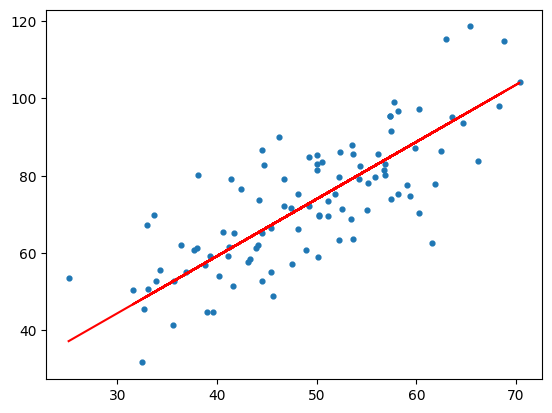

In [21]:
import matplotlib.pyplot as plt
import pandas as pd


def TrainLinearModel(learning_rate, epochs, X,Y):
  m = 0
  c = 0
  L = learning_rate
  y_predicted = 0
  n = len(X)
  for i in range(epochs):
    y_predicted = m*X + c

    # MSE loss function is commonly used. It is defined as:
    #   L = (1/n) * Σ(Y[i] - Y_pred[i])^2
    # To determine the gradient of the loss with respect to the slope m, we calculate the partial derivative of the loss function L with respect to m. This is written as ∂L/∂m.
    # Here L is a function of Y_pred, and Y_pred is a function of m. Hence we can use chain rule to compute the derivative.

    # ∂L/∂Y_pred = (1/n) * -2 * (Y - Y_pred)
    # ∂Y_pred/∂m = X

    # Hence by applying chain rule we can compute ∂L/∂m as follows :
    # ∂L/∂m = ∂L/∂Y_pred * ∂Y_pred/∂m
    #       = (1/n) * -2 * (Y - Y_pred) * X
    #       = (-2/n) * Σ(X[i] * (Y[i] - Y_pred[i]))

    partialDerivative_m = (-2/n)*sum(X*(Y - y_predicted))
    # The derivative with respect to 'c' can be determined in a similar way as shown above.
    partialDerivative_c = (-2/n)*sum((Y - y_predicted))

    # Computing the new values for the weights and bias using gradient descent
    m = m-(L*partialDerivative_m)
    c = c-(L*partialDerivative_c)
  y_predicted = m*X + c
  return y_predicted

# Start of the program, here we read the input data from the file
url = 'https://raw.githubusercontent.com/ruthvik-990/Machine_Learning/homework-2/HW2_linear_data.csv'
input_data = pd.read_csv(url,header=None)
feature_vector_X = input_data.iloc[:,0]
Label_vector_Y = input_data.iloc[:,1]

predicted_vector = TrainLinearModel(0.0001,1000,feature_vector_X,Label_vector_Y)
plt.scatter(feature_vector_X,Label_vector_Y,s=12)
#plotting x and predicted y value with minimum loss function
plt.plot(feature_vector_X,predicted_vector,color='red')
plt.show()

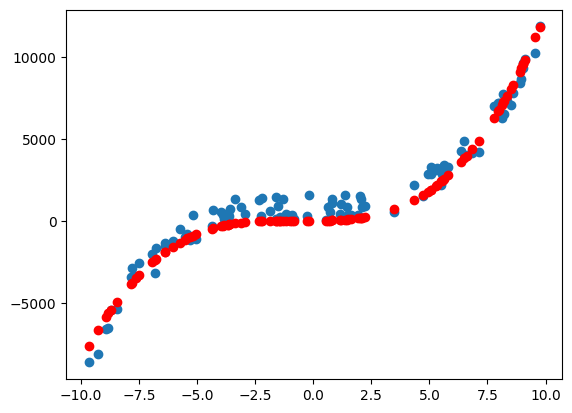

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

def TrainCubicModel(learning_rate, epochs, X,Y):
  a,b,c,d = 0,0,0,0
  L = learning_rate
  y_predicted = 0
  n = len(X)
  for i in range(epochs):
    y_predicted = a*X**3 + b*X**2+c*X+d

    # MSE loss function is commonly used. It is defined as:
    #   L = (1/n) * Σ(Y[i] - Y_pred[i])^2
    # To determine the gradient of the loss with respect to 'a', we calculate the partial derivative of the loss function L with respect to 'a'. This is written as ∂L/∂a.
    # We can use chain rule to compute the derivative.

    # ∂L/∂Y_pred = (1/n) * -2 * (Y - Y_pred)
    # ∂Y_pred/∂a = X**3

    # Hence by applying chain rule we can compute ∂L/∂a as follows :
    # ∂L/∂a = ∂L/∂Y_pred * ∂Y_pred/∂a
    #       = (1/n) * -2 * (Y - Y_pred) * X**3
    #       = (-2/n) * Σ(X[i]**3 * (Y[i] - Y_pred[i]))
    # Similarly we can determine the other derivatives.

    partialDerivative_a = (-2/n)*sum(X**3*(Y - y_predicted))
    partialDerivative_b = (-2/n)*sum(X**2*(Y - y_predicted))
    partialDerivative_c = (-2/n)*sum(X*(Y - y_predicted))
    partialDerivative_d = (-2/n)*sum((Y - y_predicted))

    # Updating the coefficients using gradient descent
    a = a-(L*partialDerivative_a)
    b = b-(L*partialDerivative_b)
    c = c-(L*partialDerivative_c)
    d = d-(L*partialDerivative_d)

  y_predicted = a*X**3 + b*X**2+c*X+d
  return y_predicted

# Start of program, here we read input data from the file
url = 'https://raw.githubusercontent.com/ruthvik-990/Machine_Learning/homework-2/HW2_nonlinear_data.csv'
input_data = pd.read_csv(url,header=0)
feature_vector_X2 = input_data.iloc[:,0]
label_vector_Y2 = input_data.iloc[:,1]

pred_y = TrainCubicModel(0.000001,10000,feature_vector_X2,label_vector_Y2)

plt.scatter(feature_vector_X2,label_vector_Y2)
plt.scatter(feature_vector_X2,pred_y,color='red')
plt.show()